# Assignment
## Prediction of Car Prices 

#### Problem Statement:

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

- Which variables are significant in predicting the price of a car
- How well those variables describe the price of a car
    
Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market. 

## Step 1: Reading and Understanding the Data


In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Let us first import NumPy and Pandas and read the housing dataset

import numpy as np
import pandas as pd

In [3]:
CarPrice = pd.read_csv('CarPrice_Assignment.csv')

In [4]:
# check the head of dataset
CarPrice.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
CarPrice.shape

(205, 26)

In [6]:
CarPrice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [7]:
# Though the above step shows non-null values for all the columns still cross verified using .isnull()
CarPrice.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [8]:
CarPrice.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## Step 2: Visualising the Data

In [9]:
# imported matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

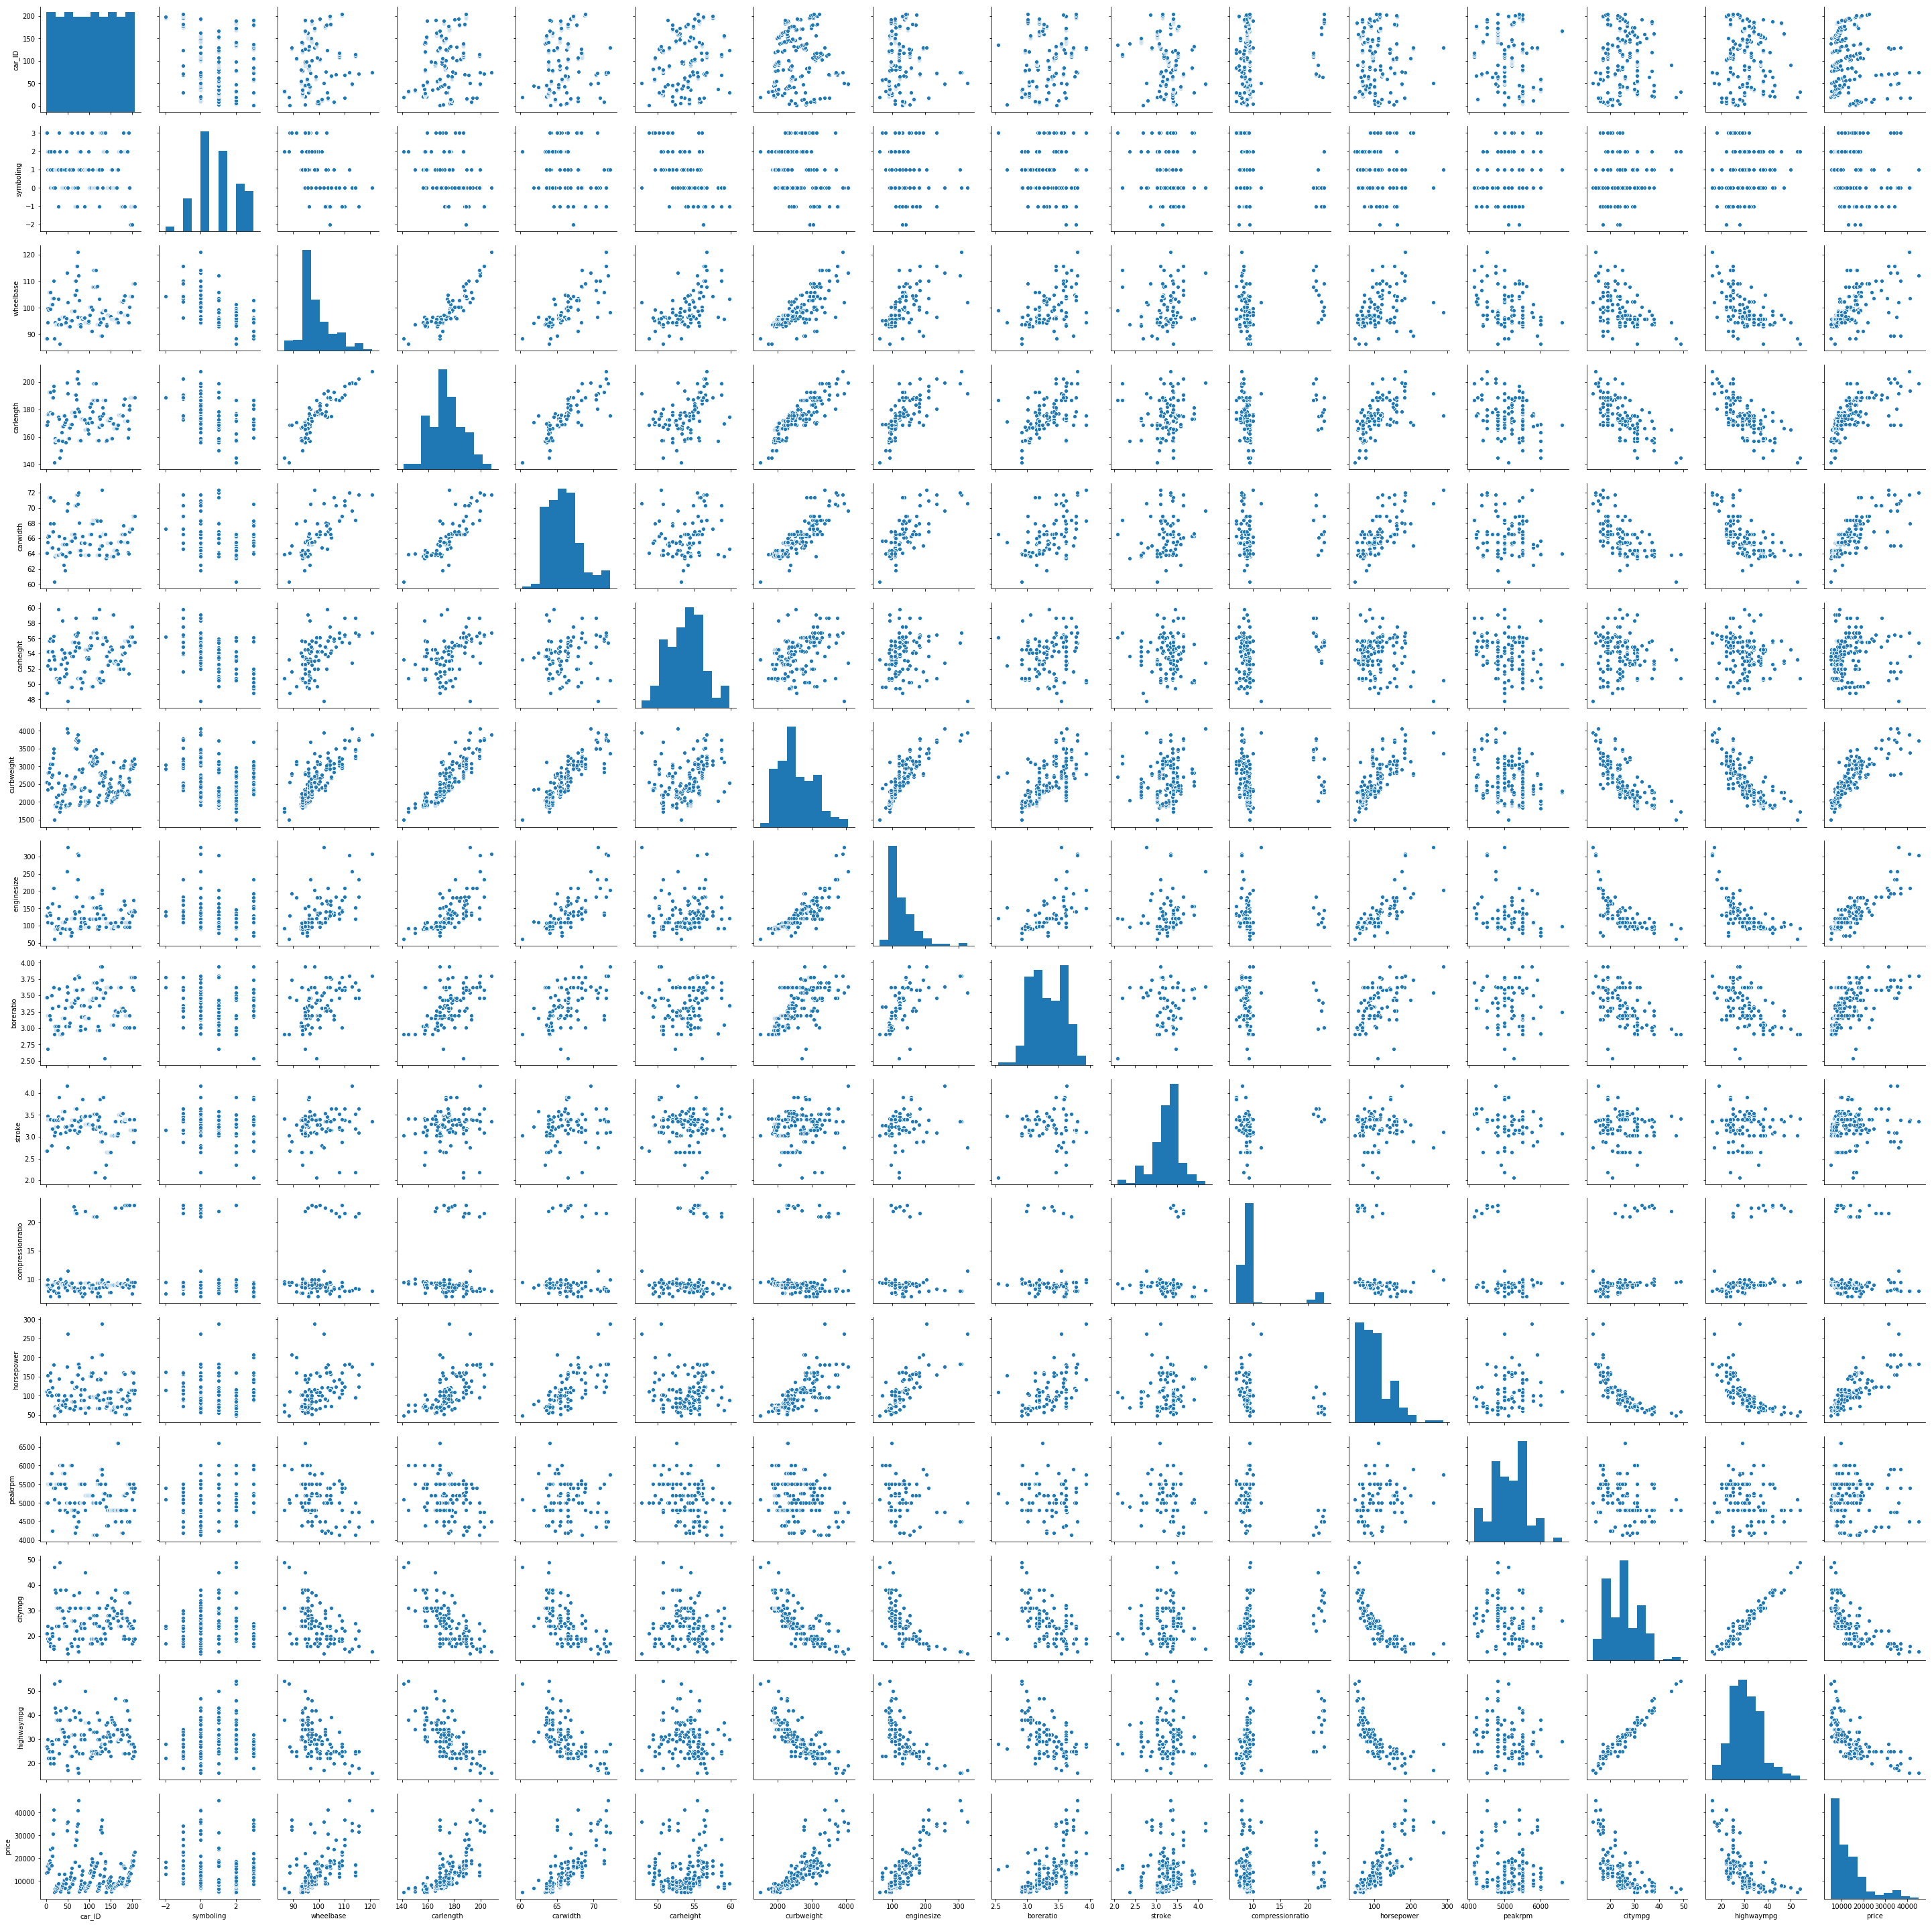

In [10]:
# created the pair plot for looking at all the numerical variables
sns.pairplot(CarPrice)
plt.show()

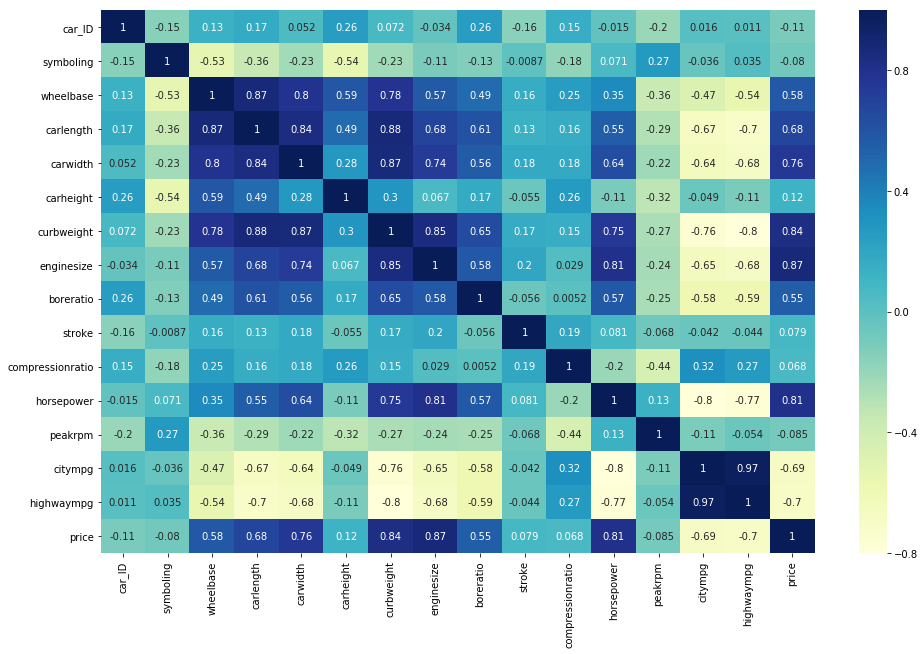

In [11]:
# created heatmap to view the correlation value since we've many numerical variables
plt.figure(figsize = (16, 10))
sns.heatmap(CarPrice.corr(), annot = True, cmap="YlGnBu")
plt.show()

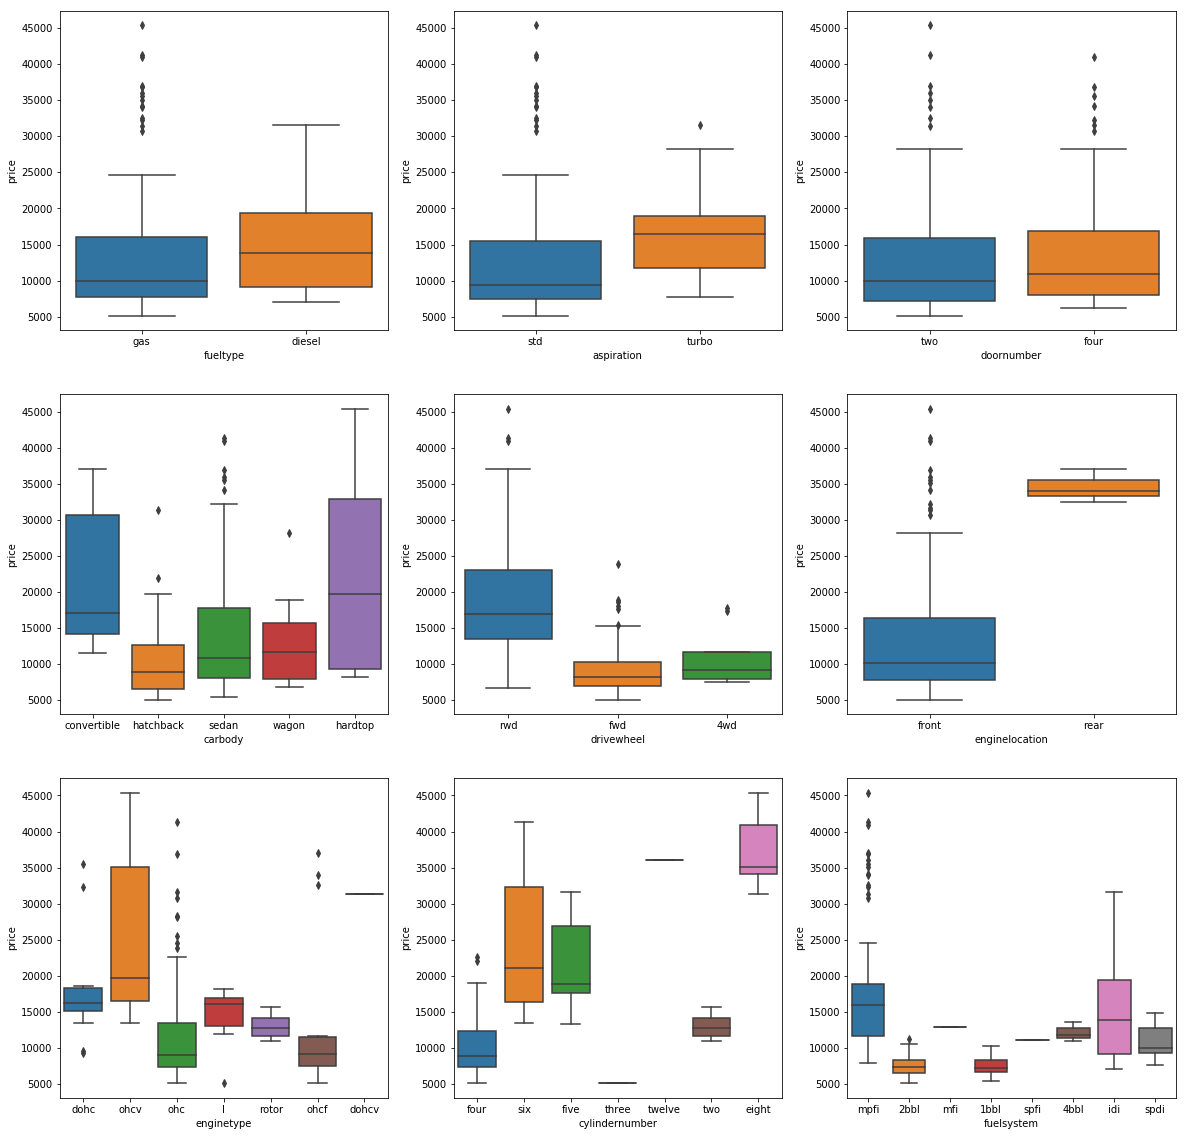

In [12]:
# visualising the categorical variables

plt.figure(figsize=(20, 20))
plt.subplot(3,3,1)
sns.boxplot(x = 'fueltype', y = 'price', data = CarPrice)
plt.subplot(3,3,2)
sns.boxplot(x = 'aspiration', y = 'price', data = CarPrice)
plt.subplot(3,3,3)
sns.boxplot(x = 'doornumber', y = 'price', data = CarPrice)
plt.subplot(3,3,4)
sns.boxplot(x = 'carbody', y = 'price', data = CarPrice)
plt.subplot(3,3,5)
sns.boxplot(x = 'drivewheel', y = 'price', data = CarPrice)
plt.subplot(3,3,6)
sns.boxplot(x = 'enginelocation', y = 'price', data = CarPrice)
plt.subplot(3,3,7)
sns.boxplot(x = 'enginetype', y = 'price', data = CarPrice)
plt.subplot(3,3,8)
sns.boxplot(x = 'cylindernumber', y = 'price', data = CarPrice)
plt.subplot(3,3,9)
sns.boxplot(x = 'fuelsystem', y = 'price', data = CarPrice)
plt.show()

## Step 3: Data Preparation and Data Cleaning

- Since the car price could be affected with the brand name we thought of extracting the company name from the car name and not the car model. Company name is also going to be cleaned since this parameter has few duplicates in it and going to be a parameter entering into the model

In [13]:
# splitting carname as 'company name' and 'model name'

CarPrice['CompanyName'] = CarPrice['CarName'].str.split(' ').str[0]

In [14]:
# looking at the unique values in car names
CarPrice['CompanyName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [15]:
# cleaning the car names which are duplicated (due to spelling error)

CarPrice['CompanyName'] = CarPrice['CompanyName'].replace({'maxda':'mazda','Nissan':'nissan','porcshce':'porsche','toyouta':'toyota','vokswagen':'volkswagen','vw':'volkswagen'}) 

In [16]:
# looking again at the unique values in car names
CarPrice['CompanyName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [17]:
# dropping the car name and car_id which will not be required to be carried into the model
CarPrice = CarPrice.drop(['CarName','car_ID'],axis=1)

In [18]:
# checking the dataframe
CarPrice

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.00,111,5000,21,27,13495.000,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.00,111,5000,21,27,16500.000,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.00,154,5000,19,26,16500.000,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.00,102,5500,24,30,13950.000,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.00,115,5500,18,22,17450.000,audi
5,2,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,...,mpfi,3.19,3.40,8.50,110,5500,19,25,15250.000,audi
6,1,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,...,mpfi,3.19,3.40,8.50,110,5500,19,25,17710.000,audi
7,1,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,...,mpfi,3.19,3.40,8.50,110,5500,19,25,18920.000,audi
8,1,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,...,mpfi,3.13,3.40,8.30,140,5500,17,20,23875.000,audi
9,0,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,...,mpfi,3.13,3.40,7.00,160,5500,16,22,17859.167,audi


## Dummy variables

In [19]:
# ran get_dummies function on complete dataset which automatically assigns the dummy values to all categorical columns

CarPrice = pd.get_dummies(CarPrice,drop_first=True)
CarPrice

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,CompanyName_nissan,CompanyName_peugeot,CompanyName_plymouth,CompanyName_porsche,CompanyName_renault,CompanyName_saab,CompanyName_subaru,CompanyName_toyota,CompanyName_volkswagen,CompanyName_volvo
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.00,...,0,0,0,0,0,0,0,0,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.00,...,0,0,0,0,0,0,0,0,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.00,...,0,0,0,0,0,0,0,0,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.00,...,0,0,0,0,0,0,0,0,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.00,...,0,0,0,0,0,0,0,0,0,0
5,2,99.8,177.3,66.3,53.1,2507,136,3.19,3.40,8.50,...,0,0,0,0,0,0,0,0,0,0
6,1,105.8,192.7,71.4,55.7,2844,136,3.19,3.40,8.50,...,0,0,0,0,0,0,0,0,0,0
7,1,105.8,192.7,71.4,55.7,2954,136,3.19,3.40,8.50,...,0,0,0,0,0,0,0,0,0,0
8,1,105.8,192.7,71.4,55.9,3086,131,3.13,3.40,8.30,...,0,0,0,0,0,0,0,0,0,0
9,0,99.5,178.2,67.9,52.0,3053,131,3.13,3.40,7.00,...,0,0,0,0,0,0,0,0,0,0


In [20]:
# 'symboling' was the exceptional since it had all numerical values but was infact a categorical 
#  so, extracted the dummy and then concat with above dataframe

symboling = pd.get_dummies(CarPrice['symboling'], drop_first = True)
symboling

,-1,0,1,2,3
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,1,0
5,0,0,0,1,0
6,0,0,1,0,0
7,0,0,1,0,0
8,0,0,1,0,0
9,0,1,0,0,0


In [21]:
# combined both the above dataframes

CarPrice = pd.concat([CarPrice,symboling], axis=1)

In [22]:
# dropped the unnecesary column - original symboling

CarPrice.drop(['symboling'], axis = 1, inplace = True)

In [23]:
# checked the head for the newly created dataframe
CarPrice.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,CompanyName_saab,CompanyName_subaru,CompanyName_toyota,CompanyName_volkswagen,CompanyName_volvo,-1,0,1,2,3
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,0,0,1
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,0,0,1
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,...,0,0,0,0,0,0,0,1,0,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,...,0,0,0,0,0,0,0,0,1,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,...,0,0,0,0,0,0,0,0,1,0


In [24]:
CarPrice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 69 columns):
wheelbase                 205 non-null float64
carlength                 205 non-null float64
carwidth                  205 non-null float64
carheight                 205 non-null float64
curbweight                205 non-null int64
enginesize                205 non-null int64
boreratio                 205 non-null float64
stroke                    205 non-null float64
compressionratio          205 non-null float64
horsepower                205 non-null int64
peakrpm                   205 non-null int64
citympg                   205 non-null int64
highwaympg                205 non-null int64
price                     205 non-null float64
fueltype_gas              205 non-null uint8
aspiration_turbo          205 non-null uint8
doornumber_two            205 non-null uint8
carbody_hardtop           205 non-null uint8
carbody_hatchback         205 non-null uint8
carbody_sedan           

## Step 4: Splitting the Data into Training and Testing Sets



In [25]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

CarPrice_train, CarPrice_test = train_test_split(CarPrice, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the feature - MinMaxScaler

In [26]:
# rescaled using MinMax scaler
from sklearn.preprocessing import MinMaxScaler

In [27]:
# Create a scaler object using MinMaxScaler()
scaler = MinMaxScaler()

In [28]:
# Apply scaler() to all the columns except the 'dummy' variables
num_vars = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']

CarPrice_train[num_vars] = scaler.fit_transform(CarPrice_train[num_vars])

In [29]:
# checked the head of train dataset
CarPrice_train.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,CompanyName_saab,CompanyName_subaru,CompanyName_toyota,CompanyName_volkswagen,CompanyName_volvo,-1,0,1,2,3
122,0.244828,0.426016,0.291667,0.265487,0.272692,0.139623,0.230159,0.525253,0.15000,0.083333,...,0,0,0,0,0,0,0,1,0,0
125,0.272414,0.452033,0.666667,0.212389,0.500388,0.339623,1.000000,0.464646,0.15625,0.395833,...,0,0,0,0,0,0,0,0,0,1
166,0.272414,0.448780,0.308333,0.424779,0.314973,0.139623,0.444444,0.449495,0.15000,0.266667,...,0,0,1,0,0,0,0,1,0,0
1,0.068966,0.450407,0.316667,0.088496,0.411171,0.260377,0.626984,0.247475,0.12500,0.262500,...,0,0,0,0,0,0,0,0,0,1
199,0.610345,0.775610,0.575000,0.858407,0.647401,0.260377,0.746032,0.484848,0.03125,0.475000,...,0,0,0,0,1,1,0,0,0,0


In [30]:
# checked the statistics of train dataset to see the effect of MinMax-Scaling on data
CarPrice_train.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,CompanyName_saab,CompanyName_subaru,CompanyName_toyota,CompanyName_volkswagen,CompanyName_volvo,-1,0,1,2,3
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.411141,0.525476,0.461655,0.509004,0.407878,0.241351,0.497946,0.535389,0.190787,0.227302,...,0.020979,0.076923,0.139860,0.048951,0.041958,0.090909,0.349650,0.300699,0.118881,0.125874
std,0.205581,0.204848,0.184517,0.215378,0.211269,0.154619,0.207140,0.157843,0.237181,0.165511,...,0.143818,0.267406,0.348061,0.216524,0.201198,0.288490,0.478536,0.460174,0.324786,0.332873
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.272414,0.399187,0.304167,0.353982,0.245539,0.135849,0.305556,0.464646,0.100000,0.091667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.341379,0.502439,0.425000,0.522124,0.355702,0.184906,0.500000,0.545455,0.125000,0.191667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.503448,0.669919,0.550000,0.668142,0.559542,0.301887,0.682540,0.611111,0.150000,0.283333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


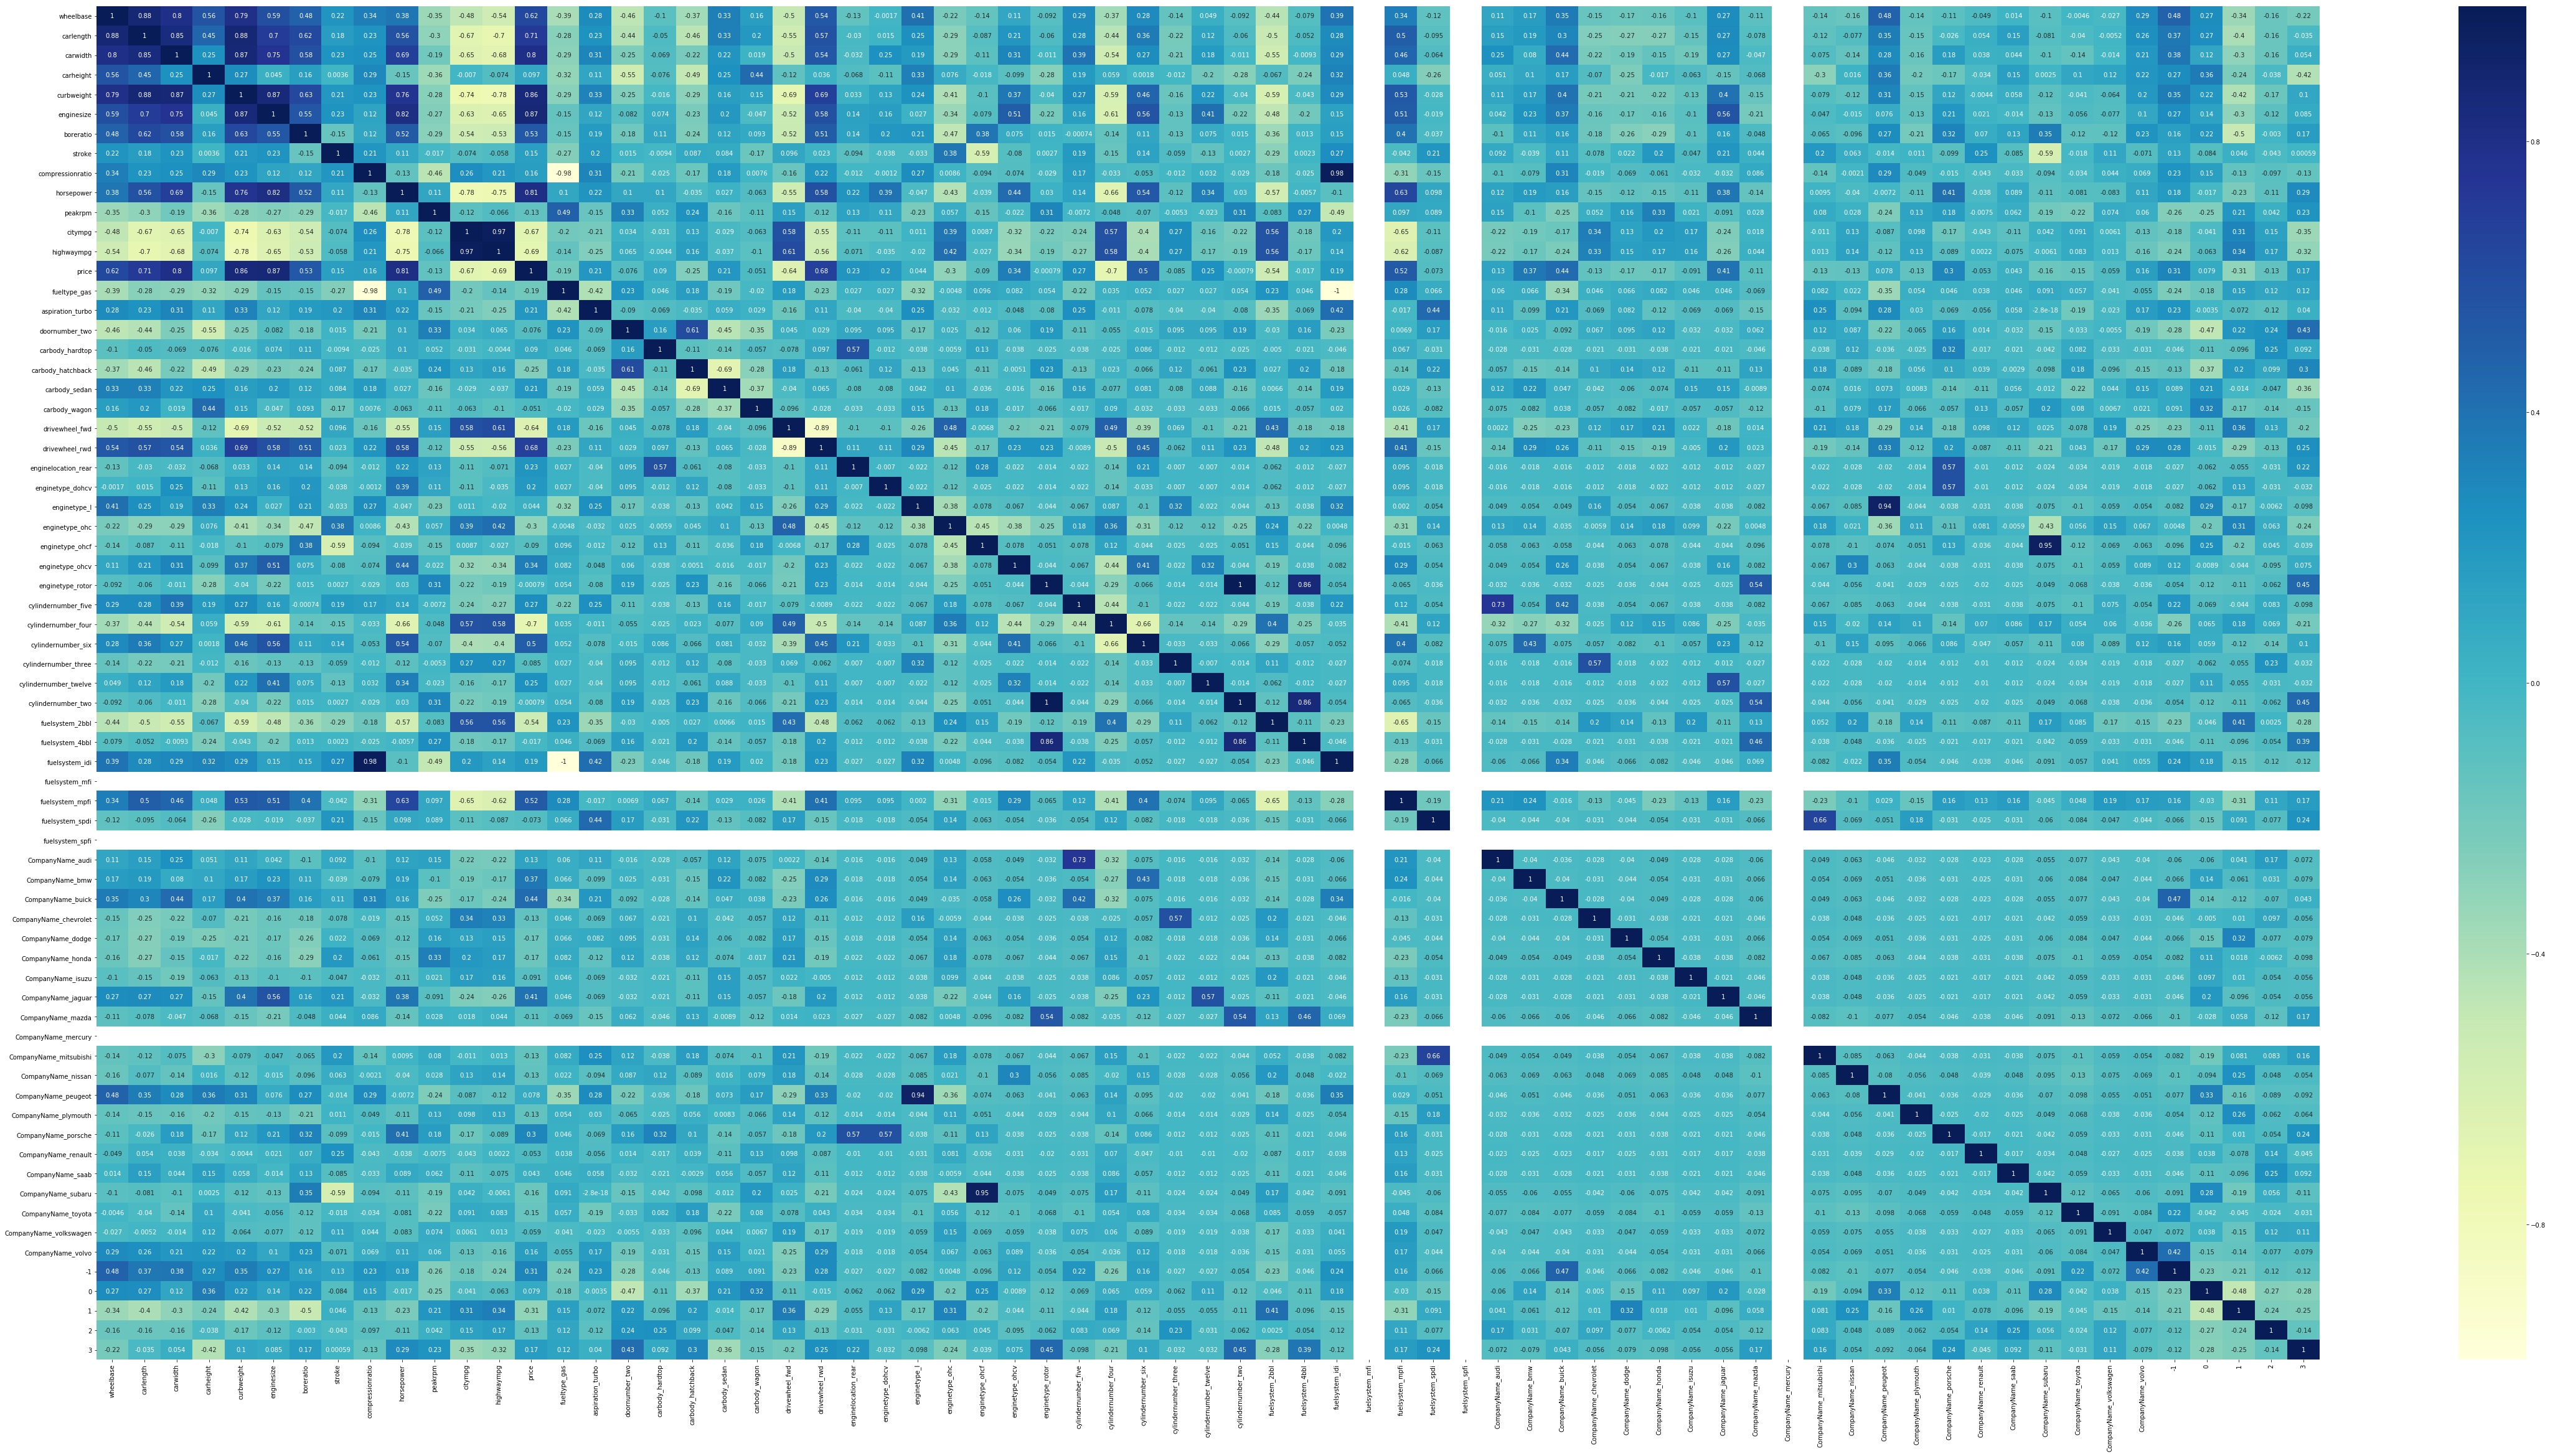

In [31]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (80, 40))
sns.heatmap(CarPrice_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

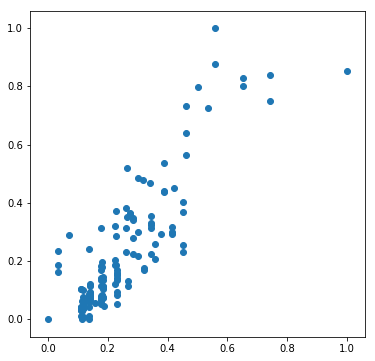

In [32]:
# as the 'enginesize' is highly correlated - checking the scatter plot to see the variance
plt.figure(figsize=[6,6])
plt.scatter(CarPrice_train.enginesize, CarPrice_train.price)
plt.show()

### Dividing into X and Y sets for the model building

In [33]:
y_train = CarPrice_train.pop('price')
X_train = CarPrice_train

## Step 5: Building a linear model


Since, we've huge set of data for creating a model. Using `statsmodels` was making it tough to go manually over each feature adding and checking the summary. Same is true for creating the model with all the columns and then eliminating the features based on `Adjusted R-squared` value and `VIF`. 


Hence, we selected the `Balanced` approach of making use of **LinearRegression function from SciKit Learn** for its compatibility with **RFE** and **statsmodel** manual feature elimination which dooesn't contribute more on the model predctions. 


We recurrsively tried with most of the values running through **RFE** and figured out to go with 11. Hence, below we'll be demostrating only with 11 features. 

### RFE (Recursive feature elimination)

In [34]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [35]:
# Running RFE with the output number of the variable equal to 12

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)             
rfe = rfe.fit(X_train, y_train)

In [36]:
# to see the ranking assigned by RFE on all the independent variables

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('wheelbase', False, 13),
 ('carlength', False, 19),
 ('carwidth', True, 1),
 ('carheight', False, 15),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', False, 2),
 ('compressionratio', False, 24),
 ('horsepower', False, 8),
 ('peakrpm', False, 10),
 ('citympg', False, 34),
 ('highwaympg', False, 25),
 ('fueltype_gas', False, 23),
 ('aspiration_turbo', False, 12),
 ('doornumber_two', False, 51),
 ('carbody_hardtop', False, 30),
 ('carbody_hatchback', False, 29),
 ('carbody_sedan', False, 31),
 ('carbody_wagon', False, 32),
 ('drivewheel_fwd', False, 56),
 ('drivewheel_rwd', False, 38),
 ('enginelocation_rear', True, 1),
 ('enginetype_dohcv', False, 11),
 ('enginetype_l', False, 7),
 ('enginetype_ohc', False, 53),
 ('enginetype_ohcf', False, 21),
 ('enginetype_ohcv', False, 45),
 ('enginetype_rotor', True, 1),
 ('cylindernumber_five', False, 5),
 ('cylindernumber_four', False, 4),
 ('cylindernumber_six', False, 27),
 ('cylindernumber_three', True

In [37]:
# looking at the columns selected by RFE
col = X_train.columns[rfe.support_]
col

Index(['carwidth', 'curbweight', 'enginesize', 'boreratio',
       'enginelocation_rear', 'enginetype_rotor', 'cylindernumber_three',
       'cylindernumber_twelve', 'CompanyName_bmw', 'CompanyName_porsche'],
      dtype='object')

In [38]:
# columns that are not selected
X_train.columns[~rfe.support_]

Index([             'wheelbase',              'carlength',
                    'carheight',                 'stroke',
             'compressionratio',             'horsepower',
                      'peakrpm',                'citympg',
                   'highwaympg',           'fueltype_gas',
             'aspiration_turbo',         'doornumber_two',
              'carbody_hardtop',      'carbody_hatchback',
                'carbody_sedan',          'carbody_wagon',
               'drivewheel_fwd',         'drivewheel_rwd',
             'enginetype_dohcv',           'enginetype_l',
               'enginetype_ohc',        'enginetype_ohcf',
              'enginetype_ohcv',    'cylindernumber_five',
          'cylindernumber_four',     'cylindernumber_six',
           'cylindernumber_two',        'fuelsystem_2bbl',
              'fuelsystem_4bbl',         'fuelsystem_idi',
               'fuelsystem_mfi',        'fuelsystem_mpfi',
              'fuelsystem_spdi',        'fuelsystem_spfi

### Building model using `statsmodel`, for the detailed statistics


In [39]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [40]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [41]:
# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()   

In [42]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     137.1
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           1.21e-64
Time:                        23:12:56   Log-Likelihood:                 190.87
No. Observations:                 143   AIC:                            -359.7
Df Residuals:                     132   BIC:                            -327.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.15

In [43]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,11.19
2,curbweight,9.26
3,enginesize,7.23
1,carwidth,4.92
4,boreratio,1.85
10,CompanyName_porsche,1.82
5,enginelocation_rear,1.66
8,cylindernumber_twelve,1.49
6,enginetype_rotor,1.24
9,CompanyName_bmw,1.13


### Dropping the variable and updating the model

In [44]:
X_train_rfe = X_train_rfe.drop(['cylindernumber_twelve'], axis = 1)

In [45]:
# Adding a constant variable 
import statsmodels.api as sm 

X_train_lm = sm.add_constant(X_train_rfe)

In [46]:
# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()   

In [47]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     152.9
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           1.18e-65
Time:                        23:12:56   Log-Likelihood:                 190.63
No. Observations:                 143   AIC:                            -361.3
Df Residuals:                     133   BIC:                            -331.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1587 

In [48]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,11.15
2,curbweight,8.64
3,enginesize,5.13
1,carwidth,4.91
4,boreratio,1.85
9,CompanyName_porsche,1.80
5,enginelocation_rear,1.65
6,enginetype_rotor,1.17
8,CompanyName_bmw,1.09
7,cylindernumber_three,1.05


### Dropping the variable and updating the model

In [49]:
X_train_rfe = X_train_rfe.drop(['curbweight'], axis = 1)

In [50]:
# Adding a constant variable 
import statsmodels.api as sm 

X_train_lm = sm.add_constant(X_train_rfe)

In [51]:
# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()   

In [52]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     152.5
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           2.01e-63
Time:                        23:12:56   Log-Likelihood:                 182.32
No. Observations:                 143   AIC:                            -346.6
Df Residuals:                     134   BIC:                            -320.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1778 

In [53]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,10.43
2,enginesize,3.12
1,carwidth,3.08
3,boreratio,1.70
8,CompanyName_porsche,1.67
4,enginelocation_rear,1.64
5,enginetype_rotor,1.14
7,CompanyName_bmw,1.09
6,cylindernumber_three,1.05


### Dropping the variable and updating the model

In [54]:
X_train_rfe = X_train_rfe.drop(['boreratio'], axis = 1)

In [55]:
# Adding a constant variable 
import statsmodels.api as sm 

X_train_lm = sm.add_constant(X_train_rfe)

In [56]:
# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()   

In [57]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     171.1
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           7.04e-64
Time:                        23:12:57   Log-Likelihood:                 180.65
No. Observations:                 143   AIC:                            -345.3
Df Residuals:                     135   BIC:                            -321.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1925 

In [58]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,8.41
2,enginesize,3.02
1,carwidth,2.86
3,enginelocation_rear,1.64
7,CompanyName_porsche,1.59
4,enginetype_rotor,1.13
6,CompanyName_bmw,1.09
5,cylindernumber_three,1.05


### Dropping the variable and updating the model

In [59]:
X_train_rfe = X_train_rfe.drop(['CompanyName_porsche'], axis = 1)

In [60]:
# Adding a constant variable 
import statsmodels.api as sm 

X_train_lm = sm.add_constant(X_train_rfe)

In [61]:
# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()   

In [62]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     197.0
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           1.62e-64
Time:                        23:12:57   Log-Likelihood:                 179.35
No. Observations:                 143   AIC:                            -344.7
Df Residuals:                     136   BIC:                            -324.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1976 

In [63]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,8.11
2,enginesize,3.02
1,carwidth,2.75
4,enginetype_rotor,1.12
6,CompanyName_bmw,1.09
3,enginelocation_rear,1.08
5,cylindernumber_three,1.05


Now as we can see, the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.

## Step 7: Residual Analysis of the train data

Checking if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression)

In [64]:
y_train_price = lm.predict(X_train_lm)

Text(0.5,0,'Errors')

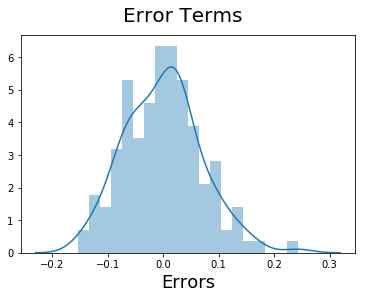

In [65]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final model.

#### Applying the scaling on the test sets

In [66]:
# Apply scaler() to all the columns except the 'dummy' variables
num_vars = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']

CarPrice_test[num_vars] = scaler.fit_transform(CarPrice_test[num_vars])

In [67]:
CarPrice_test.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,CompanyName_saab,CompanyName_subaru,CompanyName_toyota,CompanyName_volkswagen,CompanyName_volvo,-1,0,1,2,3
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,0.370121,0.486741,0.375212,0.454249,0.371743,0.228835,0.667691,0.654504,0.209375,0.359521,...,0.048387,0.016129,0.193548,0.080645,0.080645,0.145161,0.274194,0.177419,0.241935,0.145161
std,0.179970,0.183964,0.208977,0.234487,0.222354,0.188416,0.228484,0.173913,0.273690,0.252970,...,0.216335,0.127000,0.398304,0.274512,0.274512,0.355139,0.449749,0.385142,0.431751,0.355139
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.265306,0.389764,0.221053,0.264423,0.219125,0.126638,0.515873,0.590164,0.093750,0.140323,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.327988,0.475591,0.326316,0.485577,0.344065,0.183406,0.674603,0.699454,0.125000,0.312903,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.482507,0.642126,0.421053,0.605769,0.540726,0.287118,0.857143,0.759563,0.150000,0.432258,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [68]:
y_test = CarPrice_test.pop('price')
X_test = CarPrice_test

In [69]:
# Adding constant variable to test dataframe
X_test_new = sm.add_constant(X_test)

In [70]:
# Creating X_test_new dataframe by dropping variables from X_test_new

X_test_new = X_test_new[X_train_rfe.columns]

In [71]:
# Making predictions using the fourth model

y_pred_new = lm.predict(X_test_new)

## Step 9: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0,0.5,'y_pred')

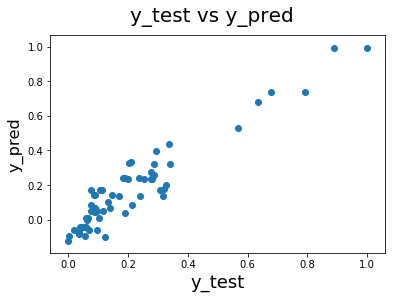

In [72]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_new)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      


Equation of our best fitted line is:

$ price = 0.7192  \times  enginesize + 0.4850  \times  carwidth + 0.4454 \times Enginelocation Rear + 0.2459 \times CompanyName BMW + 0.1986 \times CylinderNumber Three + 0.1665 \times EngineType Rotor $

### R Squared value on test set

In [73]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_new)

0.8160623705759222